## Enhancement of Cloud Security using Machine Learning

Here, we are using classification machine learning algorithms to classify if the incoming traffic is normal or not.

In [59]:
# Importing required libraries for data analysis and visualization.
import numpy as np
import pandas as pd
from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

/var/folders/2h/sfjnmn0d72z5xv919r98xwpw0000gn/T/ipykernel_91552/2969066255.py:4: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



In [60]:
# Reading the Dataset
df = pd.read_csv('UNSW_NB15_training-set.csv')

### Exploring the dataset

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

Here, we are checking the different attributes(columns) in the dataset such as the type of service, protocol being used, duration of the connection, frequency rate of the connection, number of packets and others.

In [62]:
df.head() 

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0   1  0.000011   udp       -   INT      2      0     496       0   
1   2  0.000008   udp       -   INT      2      0    1762       0   
2   3  0.000005   udp       -   INT      2      0    1068       0   
3   4  0.000006   udp       -   INT      2      0     900       0   
4   5  0.000010   udp       -   INT      2      0    2126       0   

          rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0   90909.0902  ...                 1               2             0   
1  125000.0003  ...                 1               2             0   
2  200000.0051  ...                 1               3             0   
3  166666.6608  ...                 1               3             0   
4  100000.0025  ...                 1               3             0   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0           0                 0           1           2                0   
1           0                 0           1           2                0   
2           0                 0           1           3                0   
3           0                 0           2           3                0   
4           0                 0           2           3                0   

   attack_cat  label  
0      Normal      0  
1      Normal      0  
2      Normal      0  
3      Normal      0  
4      Normal      0  

[5 rows x 45 columns]

 ##### head() function in the above command is used to view the first few rows of the dataset. It is used to get an idea of the type of data(numerical or categorical) in the columns.

In [6]:
df.describe(include='all')

id           dur  proto service  state         spkts  \
count   82332.000000  82332.000000  82332   82332  82332  82332.000000   
unique           NaN           NaN    131      13      7           NaN   
top              NaN           NaN    tcp       -    FIN           NaN   
freq             NaN           NaN  43095   47153  39339           NaN   
mean    41166.500000      1.006756    NaN     NaN    NaN     18.666472   
std     23767.345519      4.710444    NaN     NaN    NaN    133.916353   
min         1.000000      0.000000    NaN     NaN    NaN      1.000000   
25%     20583.750000      0.000008    NaN     NaN    NaN      2.000000   
50%     41166.500000      0.014138    NaN     NaN    NaN      6.000000   
75%     61749.250000      0.719360    NaN     NaN    NaN     12.000000   
max     82332.000000     59.999989    NaN     NaN    NaN  10646.000000   

               dpkts        sbytes        dbytes          rate  ...  \
count   82332.000000  8.233200e+04  8.233200e+04  8.233200e+04  ...   
unique           NaN           NaN           NaN           NaN  ...   
top              NaN           NaN           NaN           NaN  ...   
freq             NaN           NaN           NaN           NaN  ...   
mean       17.545936  7.993908e+03  1.323379e+04  8.241089e+04  ...   
std       115.574086  1.716423e+05  1.514715e+05  1.486204e+05  ...   
min         0.000000  2.400000e+01  0.000000e+00  0.000000e+00  ...   
25%         0.000000  1.140000e+02  0.000000e+00  2.860611e+01  ...   
50%         2.000000  5.340000e+02  1.780000e+02  2.650177e+03  ...   
75%        10.000000  1.280000e+03  9.560000e+02  1.111111e+05  ...   
max     11018.000000  1.435577e+07  1.465753e+07  1.000000e+06  ...   

        ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login    ct_ftp_cmd  \
count       82332.000000    82332.000000  82332.000000  82332.000000   
unique               NaN             NaN           NaN           NaN   
top                  NaN             NaN           NaN           NaN   
freq                 NaN             NaN           NaN           NaN   
mean            3.663011        7.456360      0.008284      0.008381   
std             5.915386       11.415191      0.091171      0.092485   
min             1.000000        1.000000      0.000000      0.000000   
25%             1.000000        1.000000      0.000000      0.000000   
50%             1.000000        3.000000      0.000000      0.000000   
75%             3.000000        6.000000      0.000000      0.000000   
max            38.000000       63.000000      2.000000      2.000000   

        ct_flw_http_mthd    ct_src_ltm    ct_srv_dst  is_sm_ips_ports  \
count       82332.000000  82332.000000  82332.000000     82332.000000   
unique               NaN           NaN           NaN              NaN   
top                  NaN           NaN           NaN              NaN   
freq                 NaN           NaN           NaN              NaN   
mean            0.129743      6.468360      9.164262         0.011126   
std             0.638683      8.543927     11.121413         0.104891   
min             0.000000      1.000000      1.000000         0.000000   
25%             0.000000      1.000000      2.000000         0.000000   
50%             0.000000      3.000000      5.000000         0.000000   
75%             0.000000      7.000000     11.000000         0.000000   
max            16.000000     60.000000     62.000000         1.000000   

        attack_cat         label  
count        82332  82332.000000  
unique          10           NaN  
top         Normal           NaN  
freq         37000           NaN  
mean           NaN      0.550600  
std            NaN      0.497436  
min            NaN      0.000000  
25%            NaN      0.000000  
50%            NaN      1.000000  
75%            NaN      1.000000  
max            NaN      1.000000  

[11 rows x 45 columns]

##### describe() function here is used to get some idea about the range of values in the columns like the maximum and minimum values, standard deviation, mean, the quartile values and more.

### Checking for null values

In [7]:
df.isnull().any()

id                   False
dur                  False
proto                False
service              False
state                False
spkts                False
dpkts                False
sbytes               False
dbytes               False
rate                 False
sttl                 False
dttl                 False
sload                False
dload                False
sloss                False
dloss                False
sinpkt               False
dinpkt               False
sjit                 False
djit                 False
swin                 False
stcpb                False
dtcpb                False
dwin                 False
tcprtt               False
synack               False
ackdat               False
smean                False
dmean                False
trans_depth          False
response_body_len    False
ct_srv_src           False
ct_state_ttl         False
ct_dst_ltm           False
ct_src_dport_ltm     False
ct_dst_sport_ltm     False
ct_dst_src_ltm       False
i

##### isnull() is used to check if there are any missing values in the dataset that needs to be handled. Here, we can observe that there are no missing values in any of the columns.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

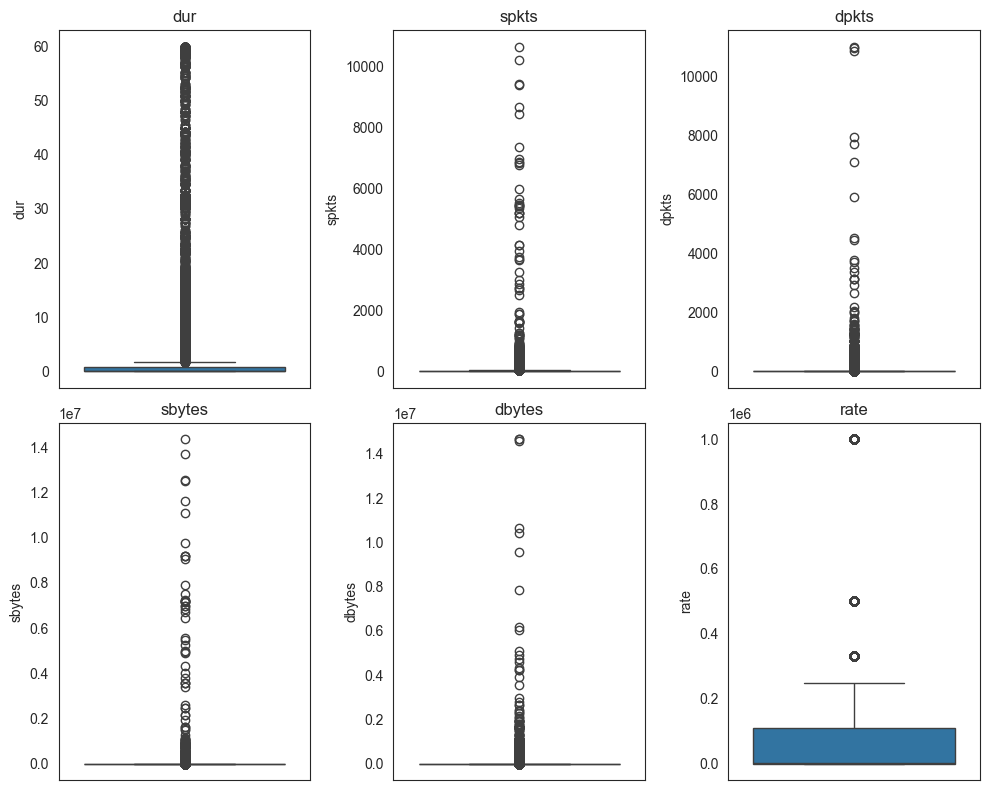

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


numerical_features = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate']
#Box plot for numerical features
plt.figure(figsize=(10, 8))
for feature in numerical_features:
    plt.subplot(2, 3, numerical_features.index(feature) + 1)
    sns.boxplot(y=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

Here, we have used box plot for the numeric features and we can observe that the are outliers that are more than the maximum value.

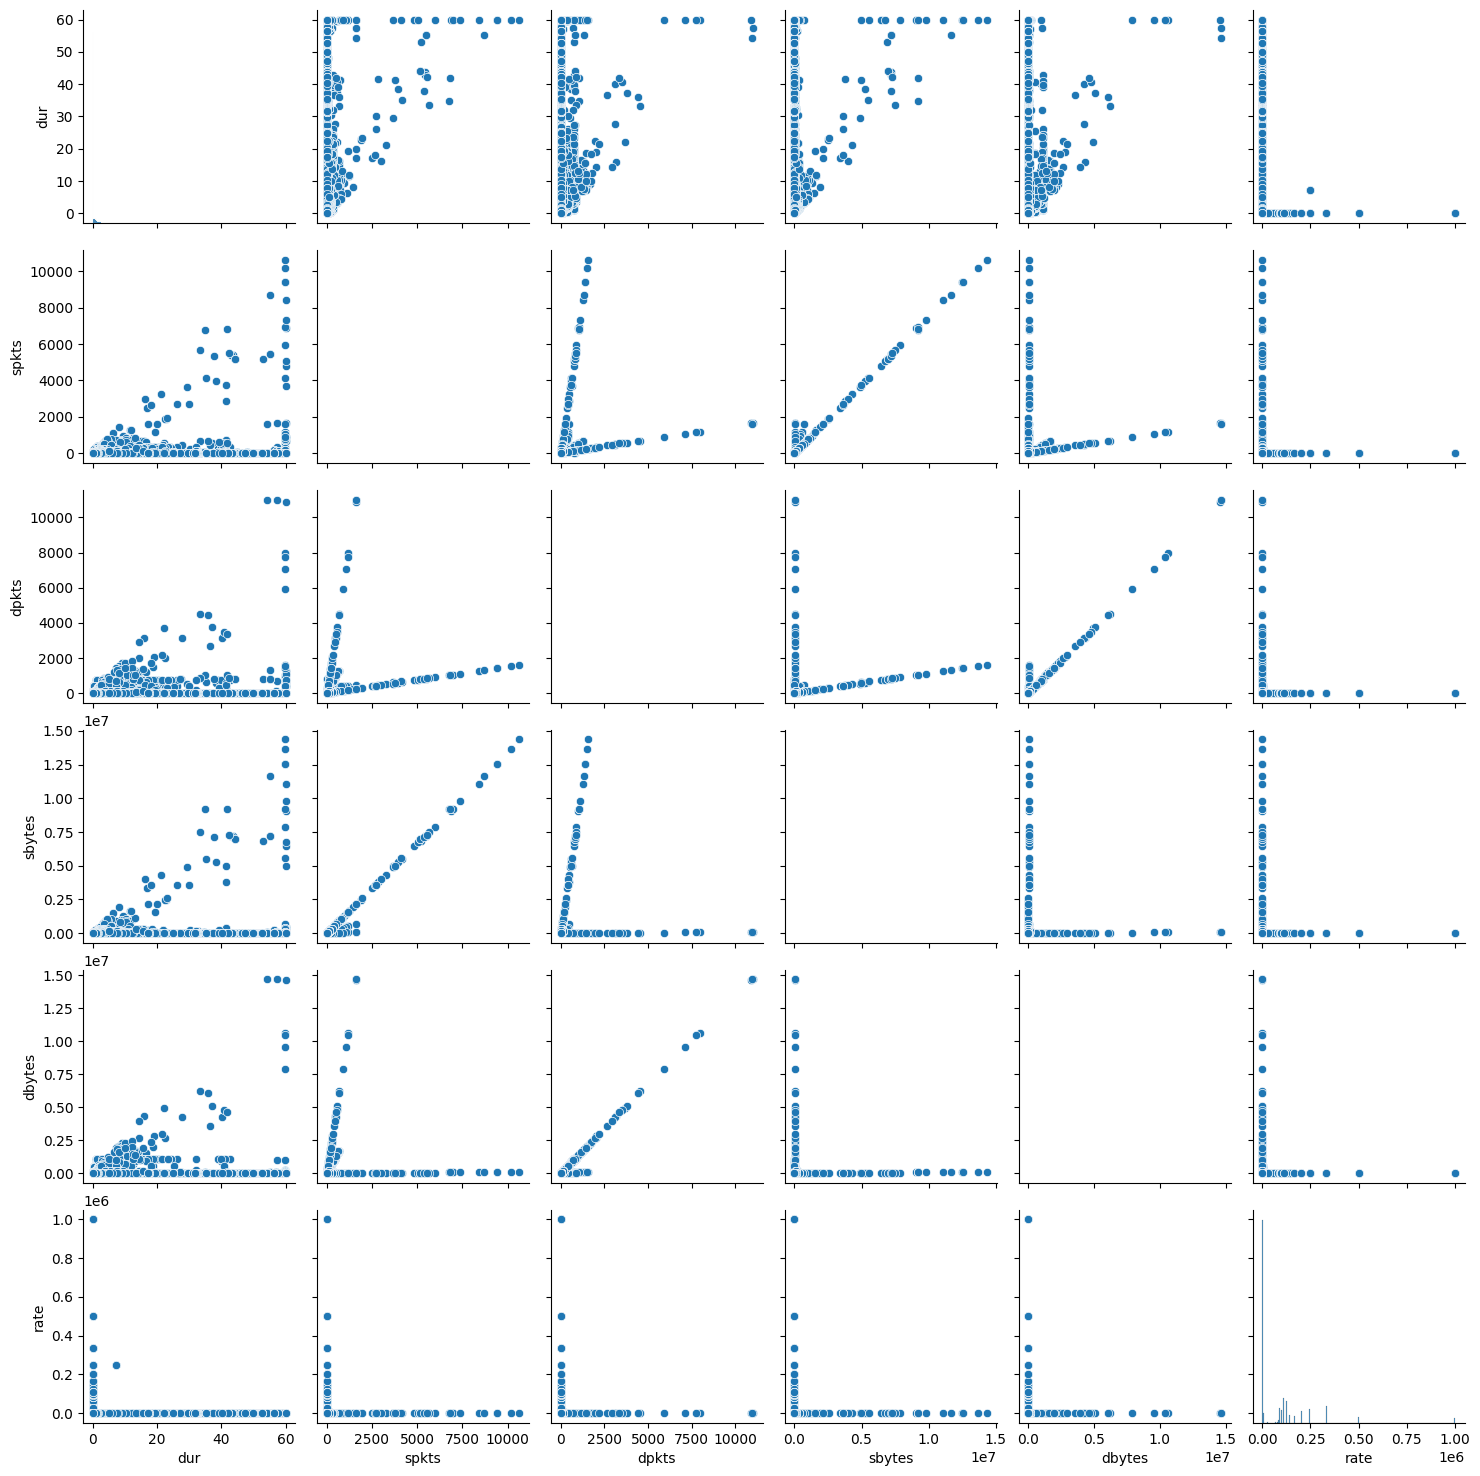

In [10]:
#Pair plot for numerical features
sns.pairplot(df[numerical_features])
plt.show()

Here, we can see that the values in the numeric features are skewed and therefore needs to be handled so as to avoid biased model.

Here, we are plotting histograms for all the attributes in the dataset.

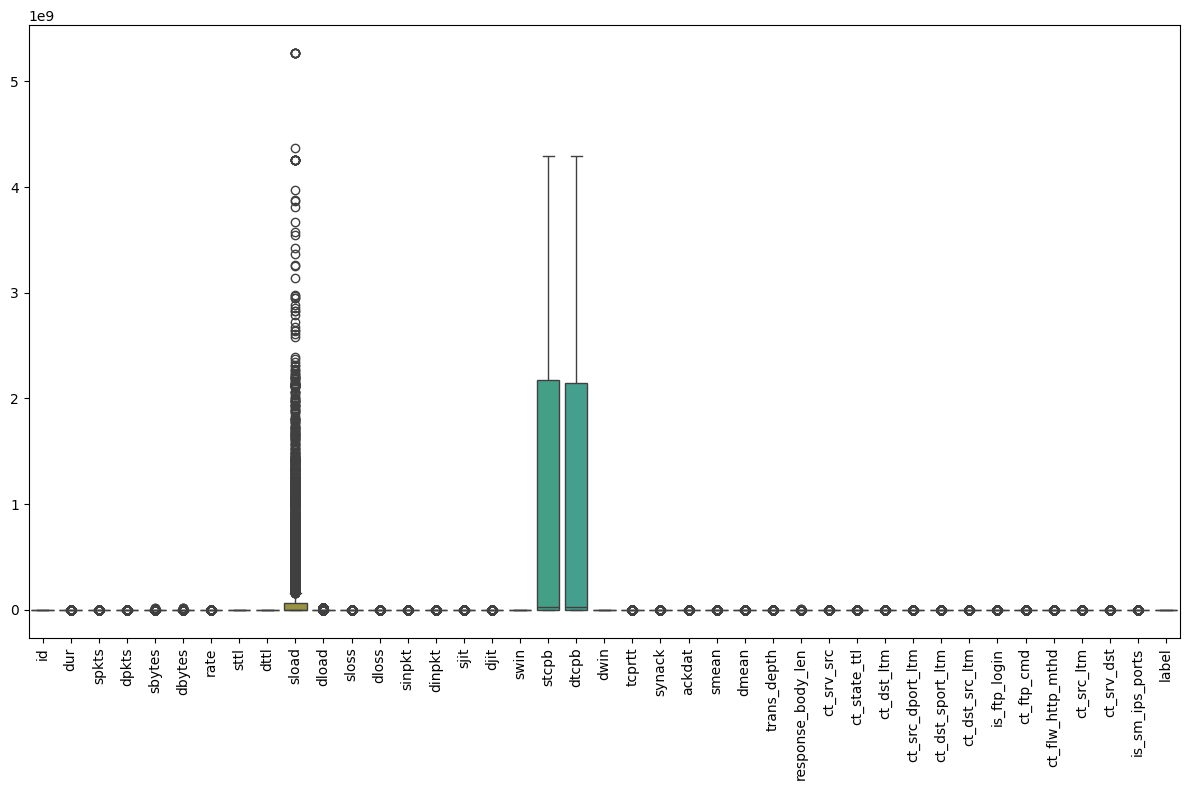

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This histogram for all the features shows that there are outlies in the numeric features like sload, stcpb, dtcpb and others. All the features with small circles indicate the presence of outliers in the values which needs to be handled.

### Data Preprocessing

In [12]:
list_drop = ['id']
df.drop(list_drop,axis=1,inplace=True)

Here, we are dropping the column 'id' since it contains unique values and would not contribute to the training of the model.

In [13]:
numeric = df.select_dtypes(include=[np.number])
numeric.describe(include='all')

dur         spkts         dpkts        sbytes        dbytes  \
count  82332.000000  82332.000000  82332.000000  8.233200e+04  8.233200e+04   
mean       1.006756     18.666472     17.545936  7.993908e+03  1.323379e+04   
std        4.710444    133.916353    115.574086  1.716423e+05  1.514715e+05   
min        0.000000      1.000000      0.000000  2.400000e+01  0.000000e+00   
25%        0.000008      2.000000      0.000000  1.140000e+02  0.000000e+00   
50%        0.014138      6.000000      2.000000  5.340000e+02  1.780000e+02   
75%        0.719360     12.000000     10.000000  1.280000e+03  9.560000e+02   
max       59.999989  10646.000000  11018.000000  1.435577e+07  1.465753e+07   

               rate          sttl          dttl         sload         dload  \
count  8.233200e+04  82332.000000  82332.000000  8.233200e+04  8.233200e+04   
mean   8.241089e+04    180.967667     95.713003  6.454902e+07  6.305470e+05   
std    1.486204e+05    101.513358    116.667722  1.798618e+08  2.393001e+06   
min    0.000000e+00      0.000000      0.000000  0.000000e+00  0.000000e+00   
25%    2.860611e+01     62.000000      0.000000  1.120247e+04  0.000000e+00   
50%    2.650177e+03    254.000000     29.000000  5.770032e+05  2.112951e+03   
75%    1.111111e+05    254.000000    252.000000  6.514286e+07  1.585808e+04   
max    1.000000e+06    255.000000    253.000000  5.268000e+09  2.082111e+07   

       ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
count  ...      82332.000000      82332.000000    82332.000000  82332.000000   
mean   ...          4.928898          3.663011        7.456360      0.008284   
std    ...          8.389545          5.915386       11.415191      0.091171   
min    ...          1.000000          1.000000        1.000000      0.000000   
25%    ...          1.000000          1.000000        1.000000      0.000000   
50%    ...          1.000000          1.000000        3.000000      0.000000   
75%    ...          4.000000          3.000000        6.000000      0.000000   
max    ...         59.000000         38.000000       63.000000      2.000000   

         ct_ftp_cmd  ct_flw_http_mthd    ct_src_ltm    ct_srv_dst  \
count  82332.000000      82332.000000  82332.000000  82332.000000   
mean       0.008381          0.129743      6.468360      9.164262   
std        0.092485          0.638683      8.543927     11.121413   
min        0.000000          0.000000      1.000000      1.000000   
25%        0.000000          0.000000      1.000000      2.000000   
50%        0.000000          0.000000      3.000000      5.000000   
75%        0.000000          0.000000      7.000000     11.000000   
max        2.000000         16.000000     60.000000     62.000000   

       is_sm_ips_ports         label  
count     82332.000000  82332.000000  
mean          0.011126      0.550600  
std           0.104891      0.497436  
min           0.000000      0.000000  
25%           0.000000      0.000000  
50%           0.000000      1.000000  
75%           0.000000      1.000000  
max           1.000000      1.000000  

[8 rows x 40 columns]

In [14]:
d =0

for feature in numeric.columns:
    if d == 1:
        print(feature)
        print('max = '+str(numeric[feature].max()))
        print('75th = '+str(numeric[feature].quantile(0.95)))
        print('median = '+str(numeric[feature].median()))
        print(numeric[feature].max()>10*numeric[feature].median())
    if numeric[feature].max()>10*numeric[feature].median() and numeric[feature].max()>10 :
        df[feature] = np.where(df[feature]<df[feature].quantile(0.95), df[feature], df[feature].quantile(0.95))

Here, we are getting comparing the max value and median of the values in the numerical columns and if the max values is greater than 10 times the median then the value of it changed to the 95th percentile value of the values in the column. This is to remove the outliers. But if this clamping is applied to all the features we might loose some important in columns with naturally diverse or bimodal distributions. Therefore to prevent that this method is applied only where the value is very high than the typical value.

In [15]:
numeric = df.select_dtypes(include=[np.number])
numeric.describe(include='all')

dur        spkts         dpkts        sbytes        dbytes  \
count  82332.000000  82332.00000  82332.000000  82332.000000  82332.000000   
mean       0.445016     11.84186      9.178424   1580.566135   2866.918367   
std        0.672222     15.66461     14.504212   2948.850472   7525.606738   
min        0.000000      1.00000      0.000000     24.000000      0.000000   
25%        0.000008      2.00000      0.000000    114.000000      0.000000   
50%        0.014138      6.00000      2.000000    534.000000    178.000000   
75%        0.719360     12.00000     10.000000   1280.000000    956.000000   
max        2.403792     60.00000     54.000000  12472.000000  30622.000000   

                rate          sttl          dttl         sload         dload  \
count   82332.000000  82332.000000  82332.000000  8.233200e+04  8.233200e+04   
mean    71576.702810    180.967667     95.713003  4.649418e+07  3.105380e+05   
std    102631.946851    101.513358    116.667722  7.417784e+07  8.918691e+05   
min         0.000000      0.000000      0.000000  0.000000e+00  0.000000e+00   
25%        28.606114     62.000000      0.000000  1.120247e+04  0.000000e+00   
50%      2650.176667    254.000000     29.000000  5.770032e+05  2.112951e+03   
75%    111111.107200    254.000000    252.000000  6.514286e+07  1.585808e+04   
max    333333.321500    255.000000    253.000000  2.666667e+08  3.741446e+06   

       ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
count  ...      82332.000000      82332.000000    82332.000000  82332.000000   
mean   ...          4.466611          3.388901        7.160679      0.008284   
std    ...          6.685037          5.029129       10.481621      0.091171   
min    ...          1.000000          1.000000        1.000000      0.000000   
25%    ...          1.000000          1.000000        1.000000      0.000000   
50%    ...          1.000000          1.000000        3.000000      0.000000   
75%    ...          4.000000          3.000000        6.000000      0.000000   
max    ...         25.000000         18.000000       37.000000      2.000000   

         ct_ftp_cmd  ct_flw_http_mthd    ct_src_ltm    ct_srv_dst  \
count  82332.000000      82332.000000  82332.000000  82332.000000   
mean       0.008381          0.092066      5.974809      8.832532   
std        0.092485          0.289121      6.867156     10.124902   
min        0.000000          0.000000      1.000000      1.000000   
25%        0.000000          0.000000      1.000000      2.000000   
50%        0.000000          0.000000      3.000000      5.000000   
75%        0.000000          0.000000      7.000000     11.000000   
max        2.000000          1.000000     25.000000     36.000000   

       is_sm_ips_ports         label  
count     82332.000000  82332.000000  
mean          0.011126      0.550600  
std           0.104891      0.497436  
min           0.000000      0.000000  
25%           0.000000      0.000000  
50%           0.000000      1.000000  
75%           0.000000      1.000000  
max           1.000000      1.000000  

[8 rows x 40 columns]

In [16]:
numeric = df.select_dtypes(include=[np.number])
df_before = numeric.copy()
d = 0
for feature in numeric.columns:
    if d == 1:
        print(feature)
        print('nunique = '+str(numeric[feature].nunique()))
        print(numeric[feature].nunique()>50)
    if numeric[feature].nunique()>50:
        if numeric[feature].min()==0:
            df[feature] = np.log(df[feature]+1)
        else:
            df[feature] = np.log(df[feature])

numeric = df.select_dtypes(include=[np.number])

Here, we are applying log function to the feature which has more than 50 unique values so that the integer values can be considered more categorically. This is being done to eliminate the right skewness in the data. The logarithm transformation compresses the larger values more than the smaller ones, effectively reducing the influence of extreme outliers and making the distribution more evenly spread.

In [17]:
cat = df.select_dtypes(exclude=[np.number])
cat.describe(include='all')

proto service  state attack_cat
count   82332   82332  82332      82332
unique    131      13      7         10
top       tcp       -    FIN     Normal
freq    43095   47153  39339      37000

In [18]:
d = 0
for feature in cat.columns:
    if d == 1:
        print(feature)
        print('nunique = '+str(cat[feature].nunique()))
        print(cat[feature].nunique()>6)
        print(sum(df[feature].isin(df[feature].value_counts().head().index)))

    if cat[feature].nunique()>6:
        df[feature] = np.where(df[feature].isin(df[feature].value_counts().head().index), df[feature], '-')

In [19]:
cat = df.select_dtypes(exclude=[np.number])
cat.describe(include='all')

proto service  state attack_cat
count   82332   82332  82332      82332
unique      6       5      6          6
top       tcp       -    FIN     Normal
freq    43095   49275  39339      37000

In [20]:
df['proto'].value_counts().head().index

Index(['tcp', 'udp', '-', 'unas', 'arp'], dtype='object', name='proto')

In [21]:
df['proto'].value_counts().index

Index(['tcp', 'udp', '-', 'unas', 'arp', 'ospf'], dtype='object', name='proto')

Here, we have reduced the cardinality of the categorical features into 5-6 features and the others are replaced by a "-" so that when the encoding of the data is done, if there are many categories, the dimension size becomes very huge which can affect while training the model.

In [22]:
df.head()

dur proto service state     spkts  dpkts    sbytes  dbytes       rate  \
0  0.000011   udp       -   INT  0.693147    0.0  6.206576     0.0  11.417626   
1  0.000008   udp       -   INT  0.693147    0.0  7.474205     0.0  11.736077   
2  0.000005   udp       -   INT  0.693147    0.0  6.973543     0.0  12.206078   
3  0.000006   udp       -   INT  0.693147    0.0  6.802395     0.0  12.023757   
4  0.000010   udp       -   INT  0.693147    0.0  7.661998     0.0  11.512935   

   sttl  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0   254  ...               1.0             2.0             0           0   
1   254  ...               1.0             2.0             0           0   
2   254  ...               1.0             3.0             0           0   
3   254  ...               1.0             3.0             0           0   
4   254  ...               1.0             3.0             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0               0.0         1.0         2.0                0      Normal   
1               0.0         1.0         2.0                0      Normal   
2               0.0         1.0         3.0                0      Normal   
3               0.0         2.0         3.0                0      Normal   
4               0.0         2.0         3.0                0      Normal   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 44 columns]

### Feature Selection

              feature         score
32       is_ftp_login  2.169648e+01
33         ct_ftp_cmd  2.468076e+01
22              smean  9.680493e+01
21             ackdat  1.100448e+02
24        trans_depth  2.284359e+02
34   ct_flw_http_mthd  2.291240e+02
20             synack  2.550030e+02
19             tcprtt  3.157251e+02
37    is_sm_ips_ports  1.122273e+03
2              sbytes  3.278490e+03
12             dinpkt  5.078488e+03
25  response_body_len  5.255736e+03
27       ct_state_ttl  6.947356e+03
0               spkts  7.812781e+03
11             sinpkt  9.971425e+03
14               djit  1.157659e+04
7               sload  1.747411e+04
1               dpkts  2.064451e+04
4                rate  2.478945e+04
13               sjit  2.479605e+04
9               sloss  3.403161e+04
23              dmean  4.279038e+04
28         ct_dst_ltm  4.828637e+04
35         ct_src_ltm  5.171041e+04
10              dloss  5.238466e+04
3              dbytes  6.140787e+04
26         ct_srv_src  7.887

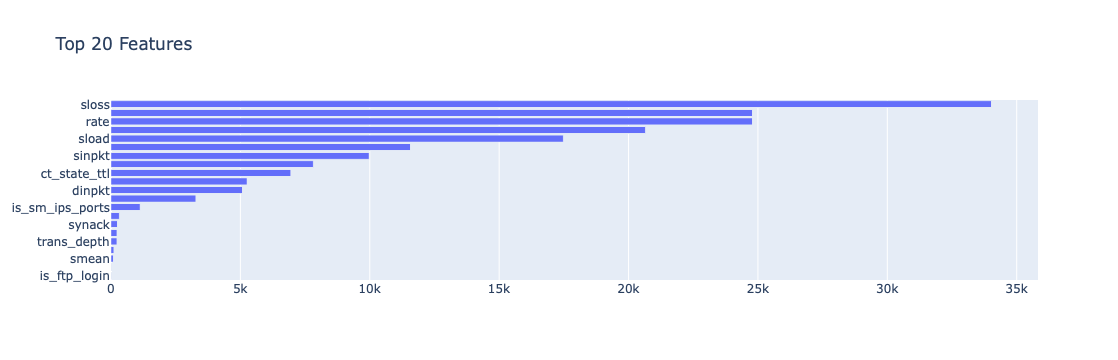

In [23]:
from sklearn.feature_selection import SelectKBest, chi2

best_features = SelectKBest(score_func=chi2,k='all')

X = df.iloc[:,4:-2]
y = df.iloc[:,-1]

fit = best_features.fit(X,y)

df_scores=pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(X.columns)

feature_score=pd.concat([df_col,df_scores],axis=1)
feature_score.columns=['feature','score']
feature_score.sort_values(by=['score'],ascending=True,inplace=True)

fig = go.Figure(go.Bar(
            x=feature_score['score'][0:21],
            y=feature_score['feature'][0:21],
            orientation='h'))

fig.update_layout(title="Top 20 Features",
                  height=1200,
                  showlegend=False,
                 )

print(feature_score.sort_values(by = ['score'],ascending = True))
fig.show()

Here, we are using chi square scoring method to find the best features in the numerical features. We first select all the numeric feature and then fit function calculate the chi square value for all the features and then according to the scores we get the best 20 features.

### Data Encoding

In [24]:
X = df.iloc[:,:-2]
y = df.iloc[:,-1]  

In [25]:
X.head()
feature_names = list(X.columns)
np.shape(X)

(82332, 42)

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

Here, we are encoding the categorical features so that it can be understood by the machine learning model and train on them.

In [27]:
np.shape(X)

(82332, 56)

In [28]:
X[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 1.09999395e-05, 6.93147181e-01, 0.00000000e+00,
       6.20657593e+00, 0.00000000e+00, 1.14176263e+01, 2.54000000e+02,
       0.00000000e+00, 1.90104856e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.09399400e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.51342875e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.00000000e+00, 2.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 2.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 2.00000000e+00, 0.00000000e+00])

In [29]:
for label in list(cat['state'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

for label in list(cat['service'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

for label in list(cat['proto'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

Here, we are giving the name for the columns for unique values with its differnt categorical features. It is then indicated in that particular column using binary format(0 and 1) to indicate the value.:

### Model training and evaluation

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify=y)

Here, we are splitting the data into train and test sets with 80% of the data for training and 20% for testing. Here, the stratify is used to balance the imbalance in the classes in the output value when the number of values of one class dominates the other class. And random state is set one to have some randomness while splitting the data.

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 18:] = sc.fit_transform(X_train[:, 18:])
X_test[:, 18:] = sc.transform(X_test[:, 18:])

Here, we are using Standard scalar to standardize the continuous features so as to ensure that all features are on a comparable scale, making it easier for machine learning models to learn the underlying patterns in the data without being influenced by differences in feature scales.

In [32]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score'])

Here, we are importing evaluation metrics such as accuracy , recall, F1 score to evalute the performance of the model.

### LOGISTIC REGRESSION

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train,y_train)
y_predictions = model.predict(X_test)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



For this classification, we use logistic regression model on train set using fit function and predict function is used to predcit the values of the test set.

In [34]:
pred_value = model.predict(X_test[4:5])[0]

actual_value = y_test.iloc[4]

print(pred_value)
print(actual_value)

1
1


Here, we are using the model to predict the 5th value in the test set. We can see that the predicted value is same as actual outcome.

In [35]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
model_performance.loc['Logistic'] = [accuracy, recall, precision, f1s]

Accuracy: 92.51%
Recall: 92.51%
Precision: 92.58%
F1-Score: 92.52%


Here, we are calculating the evaluation metrics such as accuracy, recall, precision and F1 score of the trained model.

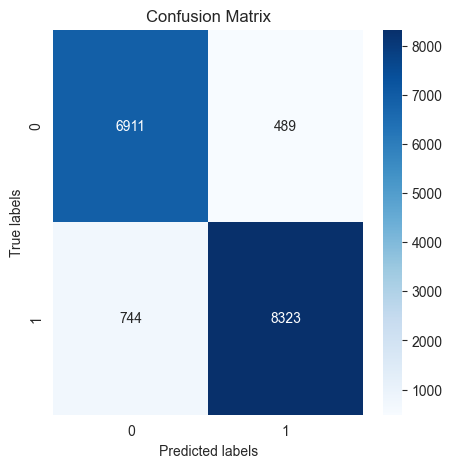

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


plt.rcParams['figure.figsize'] = 5, 5

sns.set_style("white")

cm = confusion_matrix(y_test, y_predictions)

sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Here, we are visualizing confusion matrix which shows true positives, true negatives, false positives and false negatives values in the dataset and it can be observed that false positives and false negatives are relatively low meaning that the model's accuracy is good in prediction.

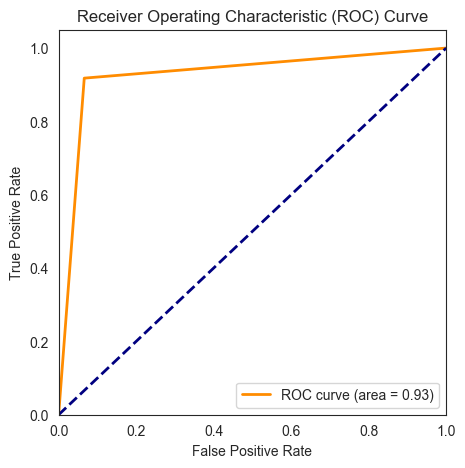

In [37]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_test, y_predictions)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Here, we are using ROC curve to evalute the model performance and it can be observed that the curve is far from the guessing line and the ROC curve area is also high meaning that the prediction is far better and better than random guessing the output.

### KNN CLASSIFIER

In [38]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
y_predictions = model.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
model_performance.loc['Logistic'] = [accuracy, recall, precision, f1s]

Accuracy: 95.00%
Recall: 95.00%
Precision: 95.05%
F1-Score: 95.01%


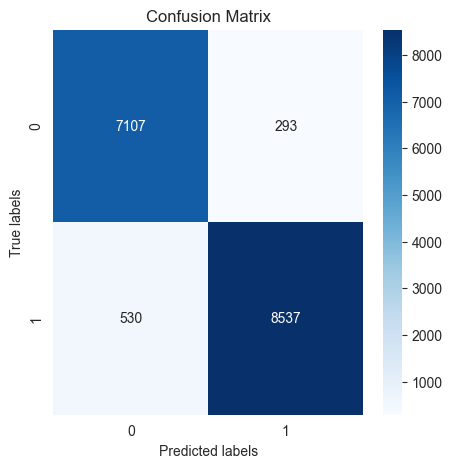

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


plt.rcParams['figure.figsize'] = 5, 5

sns.set_style("white")

cm = confusion_matrix(y_test, y_predictions)

sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

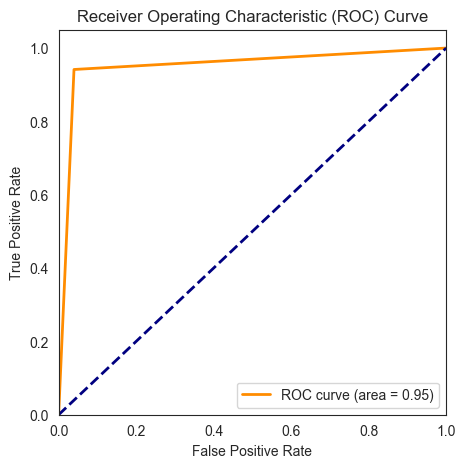

In [41]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_test, y_predictions)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### DECISION TREE

In [42]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(X_train,y_train)
y_predictions = model.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
model_performance.loc['Logistic'] = [accuracy, recall, precision, f1s]

Accuracy: 96.72%
Recall: 96.72%
Precision: 96.72%
F1-Score: 96.72%


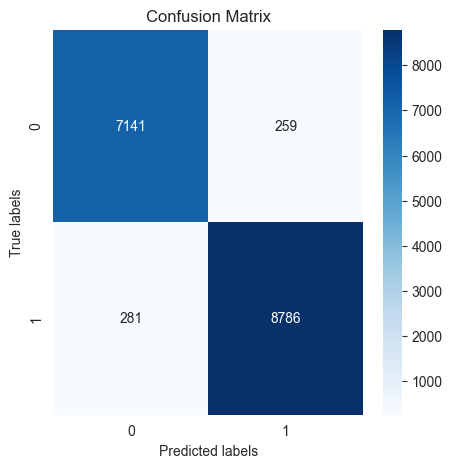

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


plt.rcParams['figure.figsize'] = 5, 5

sns.set_style("white")

cm = confusion_matrix(y_test, y_predictions)

sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

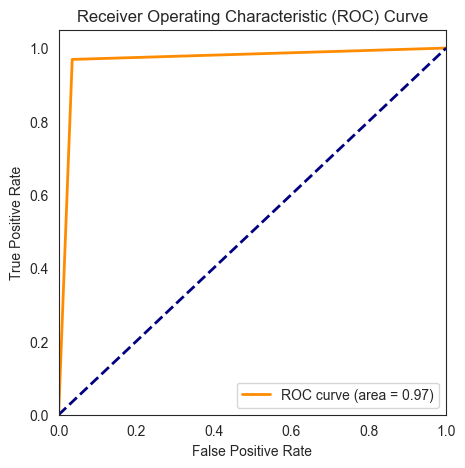

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_test, y_predictions)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### RANDOM FOREST

In [46]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100,n_jobs=-1,random_state=0,bootstrap=True,).fit(X_train,y_train)
y_predictions = model.predict(X_test)

In [47]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
model_performance.loc['Logistic'] = [accuracy, recall, precision, f1s]

Accuracy: 97.87%
Recall: 97.87%
Precision: 97.88%
F1-Score: 97.87%


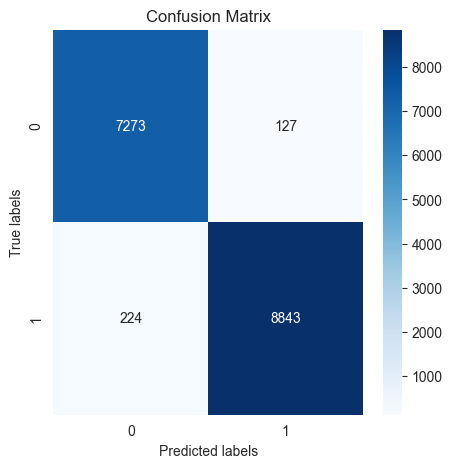

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


plt.rcParams['figure.figsize'] = 5, 5

sns.set_style("white")

cm = confusion_matrix(y_test, y_predictions)

sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

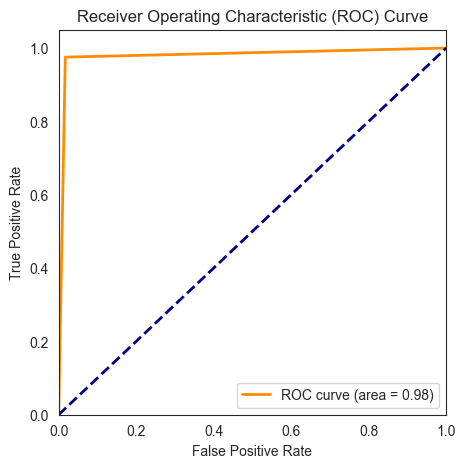

In [70]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_test, y_predictions)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##### Overall, It is evidant that the random forest classification provides best prediction when compareing with others